In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# to show the figures in the jupyter notebook itself
%matplotlib inline 

In [2]:
train = pd.read_csv('train.csv') # loading the training data
train.head()

,id,county,city,zipcode,address,state,latitude,longitude,cemetery_dist_miles,nationalhighway_miles,...,yearbuilt,pool,fireplace,patio,lotsize,Census_MedianIncome,Unemployment,EmploymentDiversity,Crime_Rate,rent
0,train_0,NaN,WEXFORD,NaN,266 Clematis Dr Allegheny County,PA,40.618200,-80.077600,1.019586,0.206222,...,2008,0,1,0,4086.388045,54476.09,5.1,3.48,2.4,2400
1,train_1,NaN,WHITEHALL,NaN,2310 N 1st Ave Lehigh County,PA,40.649906,-75.478940,1.019586,0.206222,...,1935,0,0,0,2247.513425,54476.09,5.1,3.48,2.4,995
2,train_2,NaN,WHITEHALL,NaN,3338 St Stephens Ln Lehigh County,PA,40.646282,-75.510056,1.019586,0.206222,...,2006,0,1,1,3109.741302,54476.09,5.1,3.48,2.4,1740
3,train_3,NaN,WAYNESBORO,NaN,97 W Main St Franklin County,PA,39.756992,-77.579704,1.019586,0.206222,...,1960,0,0,0,2349.673126,54476.09,5.1,3.48,2.4,675
4,train_4,NaN,QUAKERTOWN,NaN,200 E Broad St Bucks County,PA,40.441177,-75.332540,1.019586,0.206222,...,1960,0,0,0,2043.194023,54476.09,5.1,3.48,2.4,1300


In [3]:
test = pd.read_csv('test.csv') # loading the test data
test.head()

,id,county,city,zipcode,address,state,latitude,longitude,cemetery_dist_miles,nationalhighway_miles,...,garage,yearbuilt,pool,fireplace,patio,lotsize,Census_MedianIncome,Unemployment,EmploymentDiversity,Crime_Rate
0,test_0,LANCASTER,LANCASTER,17601.0,527 COBBLESTONE LN,PA,40.095751,-76.310557,2.969192,0.275879,...,0,1960,0,0,0,529.666667,70658.80,4.00,3.52,1.49708
1,test_1,PHILADELPHIA,PHILADELPHIA,19145.0,1549 MCKEAN ST,PA,39.926157,-75.172475,1.654512,0.082050,...,0,1916,0,0,0,1120.000000,34135.47,6.00,3.52,21.32851
2,test_2,PIKE,MATAMORAS,18336.0,13418 Dottie Drive,PA,28.068573,-82.391019,1.019586,0.206222,...,0,1960,0,0,1,1861.349755,50228.35,6.46,3.47,2.45000
3,test_3,PHILADELPHIA,PHILADELPHIA,19139.0,129 S 50TH ST,PA,39.957055,-75.221141,0.998326,0.048428,...,0,1960,0,0,0,1808.000000,31424.12,6.00,3.38,21.32851
4,test_4,PHILADELPHIA,PHILADELPHIA,19122.0,1920 N DARIEN ST,PA,39.981106,-75.148281,1.086437,0.485223,...,0,1960,0,0,1,600.000000,16000.42,6.00,3.32,21.32851


# Data Exploration

In [4]:
 # Generate descriptive statistics that summarize the central tendency,dispersion and shape of a dataset's distribution
train.describe()

,zipcode,latitude,longitude,cemetery_dist_miles,nationalhighway_miles,railline_miles,starbucks_miles,walmart_miles,hospital_miles,physician_dist_miles,...,yearbuilt,pool,fireplace,patio,lotsize,Census_MedianIncome,Unemployment,EmploymentDiversity,Crime_Rate,rent
count,24235.000000,24269.000000,24269.000000,24269.000000,24269.000000,24269.000000,24269.000000,24269.000000,24269.000000,24269.000000,...,24269.000000,24269.000000,24269.000000,24269.000000,24269.000000,24269.000000,24269.000000,24269.000000,24269.000000,24269.000000
mean,18030.844564,40.080788,-77.241598,1.206987,0.290908,1.049048,2.042534,3.528326,2.269302,0.352973,...,1958.995014,0.011455,0.206972,0.197948,3669.835108,57016.945681,5.187826,3.438248,6.394034,1599.895505
std,1477.571555,1.637096,5.817313,0.927508,0.364962,1.574878,3.205261,1.794201,2.467797,0.551741,...,23.278187,0.106415,0.405144,0.398461,3185.150540,23918.805643,0.956070,0.150563,7.345398,916.256058
min,15001.000000,-12.116930,-149.900278,0.022214,0.000027,0.000248,0.013197,0.118545,0.041096,0.000087,...,1800.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.970000,2.350000,0.000000,385.000000
25%,17111.000000,39.966766,-77.008588,0.818566,0.143624,0.465909,0.959076,2.712467,1.160151,0.170974,...,1960.000000,0.000000,0.000000,0.000000,1712.000000,40817.450000,4.500000,3.370000,1.468825,1000.000000
50%,18944.000000,40.130169,-75.475763,1.019586,0.206222,0.629888,1.348776,3.326397,1.584675,0.229126,...,1960.000000,0.000000,0.000000,0.000000,2872.730796,54476.090000,5.100000,3.480000,2.400000,1400.000000
75%,19128.000000,40.444389,-75.185042,1.227709,0.281964,0.860038,1.789913,3.870699,2.196950,0.299176,...,1960.000000,0.000000,0.000000,0.000000,4266.189119,70379.790000,6.000000,3.540000,9.136104,1895.000000
max,19611.000000,61.218056,-11.706829,9.747778,7.920969,28.306430,63.618152,26.409748,32.433629,14.301216,...,2016.000000,1.000000,1.000000,1.000000,19341.000000,198425.570000,10.000000,3.670000,39.159639,16000.000000


In [5]:
train.info()# observing the data types of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24269 entries, 0 to 24268
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     24269 non-null  object 
 1   county                 24235 non-null  object 
 2   city                   24269 non-null  object 
 3   zipcode                24235 non-null  float64
 4   address                23317 non-null  object 
 5   state                  24269 non-null  object 
 6   latitude               24269 non-null  float64
 7   longitude              24269 non-null  float64
 8   cemetery_dist_miles    24269 non-null  float64
 9   nationalhighway_miles  24269 non-null  float64
 10  railline_miles         24269 non-null  float64
 11  starbucks_miles        24269 non-null  float64
 12  walmart_miles          24269 non-null  float64
 13  hospital_miles         24269 non-null  float64
 14  physician_dist_miles   24269 non-null  float64
 15  de

In [6]:
test.info() # observing the data types of the columns for test data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6066 entries, 0 to 6065
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     6066 non-null   object 
 1   county                 6062 non-null   object 
 2   city                   6066 non-null   object 
 3   zipcode                6062 non-null   float64
 4   address                5832 non-null   object 
 5   state                  6066 non-null   object 
 6   latitude               6066 non-null   float64
 7   longitude              6066 non-null   float64
 8   cemetery_dist_miles    6066 non-null   float64
 9   nationalhighway_miles  6066 non-null   float64
 10  railline_miles         6066 non-null   float64
 11  starbucks_miles        6066 non-null   float64
 12  walmart_miles          6066 non-null   float64
 13  hospital_miles         6066 non-null   float64
 14  physician_dist_miles   6066 non-null   float64
 15  dent

In [7]:
    test.describe() # Generate descriptive statistics that summarize the central tendency,dispersion and shape of a dataset's distribution for test data

,zipcode,latitude,longitude,cemetery_dist_miles,nationalhighway_miles,railline_miles,starbucks_miles,walmart_miles,hospital_miles,physician_dist_miles,...,garage,yearbuilt,pool,fireplace,patio,lotsize,Census_MedianIncome,Unemployment,EmploymentDiversity,Crime_Rate
count,6062.000000,6066.000000,6066.000000,6066.000000,6066.000000,6066.000000,6066.000000,6066.000000,6066.000000,6066.000000,...,6066.000000,6066.000000,6066.000000,6066.000000,6066.000000,6066.000000,6066.000000,6066.000000,6066.000000,6066.000000
mean,18011.330584,40.127378,-77.216939,1.195072,0.283241,0.998577,2.014653,3.533065,2.217595,0.344623,...,0.304649,1959.041543,0.009726,0.210188,0.203429,3670.236153,57188.726469,5.180236,3.437448,6.310720
std,1491.030279,1.501537,6.328857,0.898891,0.336502,1.380807,3.248315,1.772931,2.360423,0.533113,...,0.460296,23.389055,0.098150,0.407476,0.402582,3206.164545,23942.474937,0.956175,0.152096,7.253301
min,15001.000000,14.627948,-149.900278,0.019394,0.000035,0.005622,0.020893,0.105153,0.058856,0.004126,...,0.000000,1800.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,2.470000,0.000000
25%,17109.250000,39.967191,-77.017323,0.826311,0.147738,0.465112,0.942904,2.770294,1.164922,0.171421,...,0.000000,1960.000000,0.000000,0.000000,0.000000,1742.000000,41852.362500,4.500000,3.370000,1.468825
50%,18938.000000,40.135544,-75.480227,1.019586,0.206222,0.629888,1.348776,3.326397,1.584675,0.229126,...,0.000000,1960.000000,0.000000,0.000000,0.000000,2860.471632,54842.020000,5.100000,3.480000,2.400000
75%,19128.000000,40.445869,-75.180626,1.218029,0.276185,0.854631,1.719974,3.838039,2.118879,0.300382,...,1.000000,1960.000000,0.000000,0.000000,0.000000,4183.950559,70557.940000,6.000000,3.540000,9.136104
max,19611.000000,61.218056,121.056457,10.149980,5.712750,24.922861,63.618152,28.025815,29.350469,14.113082,...,1.000000,2016.000000,1.000000,1.000000,1.000000,19341.000000,186763.700000,8.530000,3.670000,39.159639


In [8]:
print("count samples & features: ", train.shape) # printing the number of rows and columns
print("Are there missing values: ", train.isnull().values.any()) # printing if dataset has any NaN value


count samples & features:  (24269, 35)
Are there missing values:  True


In [9]:
train.columns

Index(['id', 'county', 'city', 'zipcode', 'address', 'state', 'latitude',
       'longitude', 'cemetery_dist_miles', 'nationalhighway_miles',
       'railline_miles', 'starbucks_miles', 'walmart_miles', 'hospital_miles',
       'physician_dist_miles', 'dentist_dist_miles', 'opt_dist_miles',
       'vet_dist_miles', 'farmers_miles', 'bed', 'bath', 'halfbath', 'sqft',
       'property_type', 'garage', 'yearbuilt', 'pool', 'fireplace', 'patio',
       'lotsize', 'Census_MedianIncome', 'Unemployment', 'EmploymentDiversity',
       'Crime_Rate', 'rent'],
      dtype='object')

In [10]:
train.isnull().sum()

id                          0
county                     34
city                        0
zipcode                    34
address                   952
state                       0
latitude                    0
longitude                   0
cemetery_dist_miles         0
nationalhighway_miles       0
railline_miles              0
starbucks_miles             0
walmart_miles               0
hospital_miles              0
physician_dist_miles        0
dentist_dist_miles          0
opt_dist_miles              0
vet_dist_miles              0
farmers_miles               0
bed                         0
bath                        0
halfbath                    0
sqft                        0
property_type            3626
garage                      0
yearbuilt                   0
pool                        0
fireplace                   0
patio                       0
lotsize                     0
Census_MedianIncome         0
Unemployment                0
EmploymentDiversity         0
Crime_Rate

# Fill in Missing Values

In [11]:
#visualizing the unique values of the particular field
train.property_type.unique()

array(['Condo', 'SFR', nan, 'Duplex', 'Triplex', 'Quadplex'], dtype=object)

In [12]:
train.property_type.value_counts()

Condo       9811
SFR         8175
Duplex      2219
Triplex      330
Quadplex     108
Name: property_type, dtype: int64

In [13]:
train.property_type.mode()

0    Condo
dtype: object

In [14]:
train['property_type'] = train['property_type'].fillna(train['property_type'].mode()[0])

In [15]:
train.property_type.unique()

array(['Condo', 'SFR', 'Duplex', 'Triplex', 'Quadplex'], dtype=object)

In [16]:
#Mapping the range variable into integer ones
train['property_type']=train['property_type'].map({'Condo':1, 'SFR':2, 'Duplex':3, 'Triplex':4, 'Quadplex':5 })

In [17]:
train.info() # observing the data types of the columns for train data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24269 entries, 0 to 24268
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     24269 non-null  object 
 1   county                 24235 non-null  object 
 2   city                   24269 non-null  object 
 3   zipcode                24235 non-null  float64
 4   address                23317 non-null  object 
 5   state                  24269 non-null  object 
 6   latitude               24269 non-null  float64
 7   longitude              24269 non-null  float64
 8   cemetery_dist_miles    24269 non-null  float64
 9   nationalhighway_miles  24269 non-null  float64
 10  railline_miles         24269 non-null  float64
 11  starbucks_miles        24269 non-null  float64
 12  walmart_miles          24269 non-null  float64
 13  hospital_miles         24269 non-null  float64
 14  physician_dist_miles   24269 non-null  float64
 15  de

In [18]:
train.isnull().sum()# checking the dataframe again for null values. property_type has no more have null values

id                         0
county                    34
city                       0
zipcode                   34
address                  952
state                      0
latitude                   0
longitude                  0
cemetery_dist_miles        0
nationalhighway_miles      0
railline_miles             0
starbucks_miles            0
walmart_miles              0
hospital_miles             0
physician_dist_miles       0
dentist_dist_miles         0
opt_dist_miles             0
vet_dist_miles             0
farmers_miles              0
bed                        0
bath                       0
halfbath                   0
sqft                       0
property_type              0
garage                     0
yearbuilt                  0
pool                       0
fireplace                  0
patio                      0
lotsize                    0
Census_MedianIncome        0
Unemployment               0
EmploymentDiversity        0
Crime_Rate                 0
rent          

In [19]:
train.county.unique()

array([nan, 'ADAMS', 'ALLEGHENY', 'BEAVER', 'BEDFORD', 'BERKS', 'BLAIR',
       'BRADFORD', 'BUCKS', 'BUTLER', 'CAMBRIA', 'CARBON', 'CENTRE',
       'CHESTER', 'CLARION', 'CLEARFIELD', 'CLINTON', 'COLUMBIA',
       'CRAWFORD', 'CUMBERLAND', 'DAUPHIN', 'DELAWARE', 'ERIE', 'FAYETTE',
       'FRANKLIN', 'FULTON', 'GREENE', 'HUNTINGDON', 'INDIANA',
       'JEFFERSON', 'JUNIATA', 'LACKAWANNA', 'LANCASTER', 'LAWRENCE',
       'LEBANON', 'LEHIGH', 'LUZERNE', 'LYCOMING', 'MCKEAN', 'MERCER',
       'MIFFLIN', 'MONROE', 'MONTGOMERY', 'MONTOUR', 'NORTHAMPTON',
       'NORTHUMBERLAND', 'PERRY', 'PHILADELPHIA', 'PIKE', 'POTTER',
       'SCHUYLKILL', 'SNYDER', 'SOMERSET', 'SUSQUEHANNA', 'TIOGA',
       'UNION', 'WARREN', 'WASHINGTON', 'WAYNE', 'WESTMORELAND',
       'WYOMING', 'YORK', 'SULLIVAN', 'VENANGO', 'ARMSTRONG'],
      dtype=object)

In [20]:
train.county.value_counts()

PHILADELPHIA    6674
ALLEGHENY       3460
MONTGOMERY      1922
DELAWARE        1210
CHESTER         1143
                ... 
FULTON             2
POTTER             2
ARMSTRONG          1
JUNIATA            1
SULLIVAN           1
Name: county, Length: 64, dtype: int64

In [21]:
train.county.mode()

0    PHILADELPHIA
dtype: object

In [22]:
train.zipcode.mode()

0    19121.0
dtype: float64

In [23]:
train.address.mode()


0    Center City East Philadelphia County
dtype: object

In [24]:
train.zipcode.unique()

array([   nan, 17325., 17350., 17344., 17320., 17353., 17316., 17372.,
       17303., 17340., 15206., 15232., 15237., 15229., 15056., 15104.,
       15212., 15236., 15215., 15217., 15211., 15228., 15213., 15214.,
       15221., 15226., 15224., 15143., 15205., 15218., 15017., 15207.,
       15220., 15227., 15202., 15065., 15210., 15028., 15035., 15106.,
       15101., 15204., 15243., 15216., 15203., 15222., 15225., 15025.,
       15108., 15146., 15219., 15208., 15223., 15132., 15126., 15145.,
       15129., 15071., 15241., 15049., 15140., 15102., 15139., 15024.,
       15112., 15148., 15082., 15122., 15201., 15120., 15142., 15235.,
       15044., 15034., 15045., 15239., 15110., 15136., 15086., 15233.,
       15064., 15238., 15234., 15209., 15137., 15147., 15133., 15144.,
       15084., 15135., 15090., 15131., 15003., 15061., 15009., 15010.,
       15074., 15081., 15066., 15026., 15001., 15042., 15005., 16123.,
       16115., 15559., 17211., 15534., 19551., 19605., 19602., 19512.,
      

In [25]:
train.zipcode.value_counts()

19121.0    597
19103.0    553
19104.0    478
19146.0    391
19147.0    389
          ... 
18224.0      1
15770.0      1
15530.0      1
15634.0      1
17845.0      1
Name: zipcode, Length: 882, dtype: int64

In [26]:
train.address.value_counts()

Center City East Philadelphia County                66
Northern Liberties/ Fishtown Philadelphia County    45
Rittenhouse Square Philadelphia County              43
Center City West Philadelphia County                32
Address Not Disclosed                               32
                                                    ..
225 GREEN ST                                         1
5419 NORMLEE PL                                      1
2730 W GEORGE ST                                     1
3760 MAZELAND CT                                     1
402 HEATHERWOOD DR                                   1
Name: address, Length: 18849, dtype: int64

In [27]:
train['address']

0         266 Clematis Dr Allegheny County
1             2310 N 1st Ave Lehigh County
2        3338 St Stephens Ln Lehigh County
3             97 W Main St Franklin County
4              200 E Broad St Bucks County
                       ...                
24264                   530 E CHRISTINE RD
24265                      1510 ULSTER WAY
24266                  1801 Chestnut Place
24267            26 Pear St Luzerne County
24268       Torresdale Philadelphia County
Name: address, Length: 24269, dtype: object

In [28]:
train['county'] = train['county'].fillna(train['county'].mode()[0])
train['zipcode'] = train['zipcode'].fillna(train['zipcode'].mode()[0])
train['address'] = train['address'].fillna(train['address'].mode()[0])

In [29]:
train.isnull().sum()# checking the dataframe again for null values. it has no more have null values

id                       0
county                   0
city                     0
zipcode                  0
address                  0
state                    0
latitude                 0
longitude                0
cemetery_dist_miles      0
nationalhighway_miles    0
railline_miles           0
starbucks_miles          0
walmart_miles            0
hospital_miles           0
physician_dist_miles     0
dentist_dist_miles       0
opt_dist_miles           0
vet_dist_miles           0
farmers_miles            0
bed                      0
bath                     0
halfbath                 0
sqft                     0
property_type            0
garage                   0
yearbuilt                0
pool                     0
fireplace                0
patio                    0
lotsize                  0
Census_MedianIncome      0
Unemployment             0
EmploymentDiversity      0
Crime_Rate               0
rent                     0
dtype: int64


# EDA/Feature Engineering

In [30]:
train.dtypes

id                        object
county                    object
city                      object
zipcode                  float64
address                   object
state                     object
latitude                 float64
longitude                float64
cemetery_dist_miles      float64
nationalhighway_miles    float64
railline_miles           float64
starbucks_miles          float64
walmart_miles            float64
hospital_miles           float64
physician_dist_miles     float64
dentist_dist_miles       float64
opt_dist_miles           float64
vet_dist_miles           float64
farmers_miles            float64
bed                        int64
bath                       int64
halfbath                   int64
sqft                       int64
property_type              int64
garage                     int64
yearbuilt                  int64
pool                       int64
fireplace                  int64
patio                      int64
lotsize                  float64
Census_Med

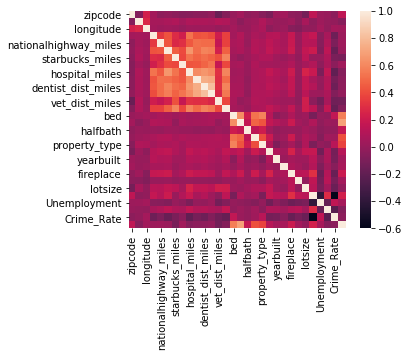

In [31]:
#CORRELATION MATRIX AMONG FEATURES
corrmat = train.corr()
f,ax = plt.subplots(figsize=(5,4))
sns.heatmap(corrmat, square=True)

In [32]:
corrmat = train.corr()
corrmat


,zipcode,latitude,longitude,cemetery_dist_miles,nationalhighway_miles,railline_miles,starbucks_miles,walmart_miles,hospital_miles,physician_dist_miles,...,yearbuilt,pool,fireplace,patio,lotsize,Census_MedianIncome,Unemployment,EmploymentDiversity,Crime_Rate,rent
zipcode,1.000000,-0.065543,0.234649,0.043877,-0.025660,-0.019033,-0.037179,-0.061050,-0.050672,-0.041526,...,0.026362,0.047139,-0.019447,-0.032412,-0.123454,0.154669,0.019760,0.007516,-0.035419,0.150529
latitude,-0.065543,1.000000,0.271007,0.057782,0.059333,0.075484,0.095494,0.047714,0.091154,0.084886,...,0.002891,0.010809,0.031572,-0.042772,0.068301,-0.027977,0.030798,-0.002101,-0.010026,-0.053651
longitude,0.234649,0.271007,1.000000,0.045873,0.029858,0.039912,0.028440,0.003423,0.034580,0.026890,...,0.002018,0.024097,-0.052941,-0.069727,-0.009002,-0.014844,0.051668,-0.008729,0.052389,0.037178
cemetery_dist_miles,0.043877,0.057782,0.045873,1.000000,0.332989,0.418973,0.282123,0.222059,0.529495,0.420559,...,0.120070,0.064244,0.178461,0.008306,0.130672,0.168479,-0.046952,0.066050,-0.147602,0.023727
nationalhighway_miles,-0.025660,0.059333,0.029858,0.332989,1.000000,0.436931,0.273077,0.305310,0.442274,0.517751,...,0.095574,0.062655,0.184461,0.012073,0.123586,0.114545,-0.052009,0.098252,-0.089273,0.025170
railline_miles,-0.019033,0.075484,0.039912,0.418973,0.436931,1.000000,0.462052,0.398096,0.652199,0.509011,...,0.104196,0.080565,0.203906,0.015852,0.167239,0.205494,-0.072716,0.148321,-0.169955,0.014051
starbucks_miles,-0.037179,0.095494,0.028440,0.282123,0.273077,0.462052,1.000000,0.384083,0.529583,0.469170,...,0.040676,0.017486,0.050838,-0.010540,0.139611,0.011033,0.000541,0.087383,-0.104836,-0.108756
walmart_miles,-0.061050,0.047714,0.003423,0.222059,0.305310,0.398096,0.384083,1.000000,0.425746,0.431497,...,0.042478,0.052015,0.097676,0.006031,0.060251,0.104970,-0.030101,0.077892,-0.034650,0.039984
hospital_miles,-0.050672,0.091154,0.034580,0.529495,0.442274,0.652199,0.529583,0.425746,1.000000,0.615370,...,0.110433,0.069930,0.201615,0.003978,0.245681,0.187879,-0.100164,0.160782,-0.198257,-0.058197
physician_dist_miles,-0.041526,0.084886,0.026890,0.420559,0.517751,0.509011,0.469170,0.431497,0.615370,1.000000,...,0.097186,0.051498,0.165150,-0.003214,0.158213,0.063079,-0.002454,0.103747,-0.116929,-0.036608


In [33]:
np.ones_like(corrmat, dtype=np.bool)

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,

In [34]:
mask = np.triu(np.ones_like(corrmat, dtype=np.bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False, False,

Numpy .ones_like can build a matrix of booleans with the same shape as our data frame, while .triu will return only the upper triangle of that matrix.

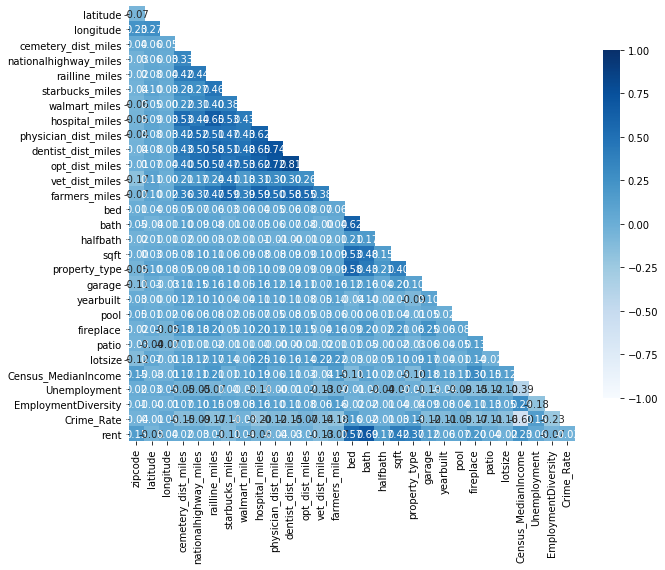

In [35]:
fig, ax = plt.subplots(figsize=(10, 8))
# mask
mask = np.triu(np.ones_like(corrmat, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = corrmat.iloc[1:,:-1].copy()
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

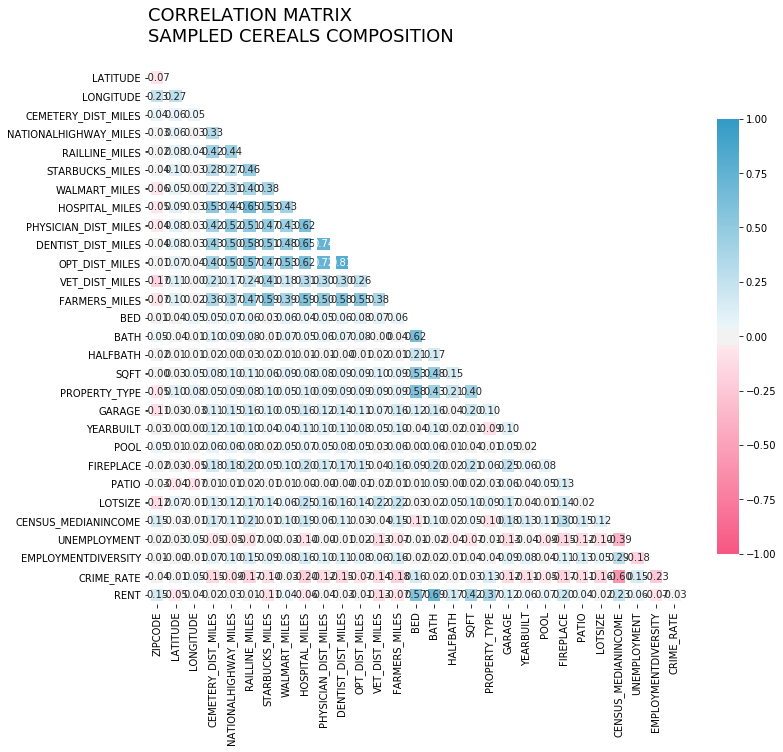

In [36]:
fig, ax = plt.subplots(figsize=(12, 10))
# mask
mask = np.triu(np.ones_like(corrmat, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = corrmat.iloc[1:,:-1].copy()
# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)
# ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
# title
title = 'CORRELATION MATRIX\nSAMPLED CEREALS COMPOSITION\n'
plt.title(title, loc='left', fontsize=18)
plt.show()

In [37]:
# Create a pair plot colored by county with a density plot of the # diagonal and format the scatter plots.
#sns.pairplot(train, hue = 'county', diag_kind = 'kde',plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},height = 4)

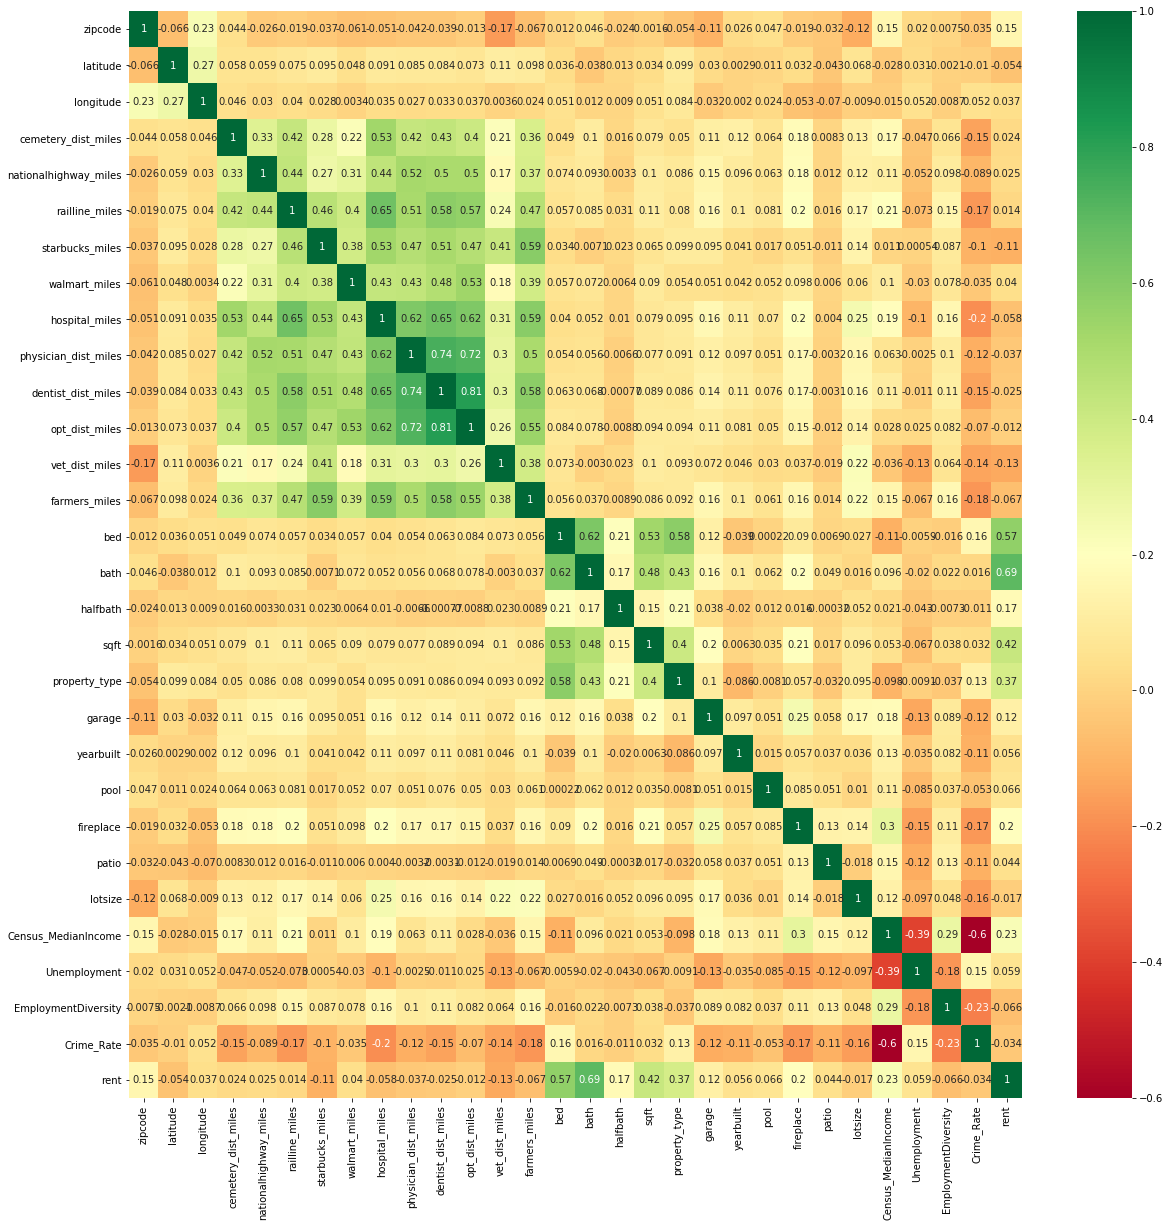

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

After performing the above pre-processing, we do not need the following columns anymore: “address, county, latitude, longitude, id ,city, state”, so, we drop them from our analysis.

In [39]:
#Remove Id columns
cols_2_remove = ['address', 'id', 'state','county','latitude','longitude','city']

newdata = train.drop(cols_2_remove, axis=1)

In [40]:
newdata.head()

,zipcode,cemetery_dist_miles,nationalhighway_miles,railline_miles,starbucks_miles,walmart_miles,hospital_miles,physician_dist_miles,dentist_dist_miles,opt_dist_miles,...,yearbuilt,pool,fireplace,patio,lotsize,Census_MedianIncome,Unemployment,EmploymentDiversity,Crime_Rate,rent
0,19121.0,1.019586,0.206222,0.629888,1.348776,3.326397,1.584675,0.229126,0.472933,0.651244,...,2008,0,1,0,4086.388045,54476.09,5.1,3.48,2.4,2400
1,19121.0,1.019586,0.206222,0.629888,1.348776,3.326397,1.584675,0.229126,0.472933,0.651244,...,1935,0,0,0,2247.513425,54476.09,5.1,3.48,2.4,995
2,19121.0,1.019586,0.206222,0.629888,1.348776,3.326397,1.584675,0.229126,0.472933,0.651244,...,2006,0,1,1,3109.741302,54476.09,5.1,3.48,2.4,1740
3,19121.0,1.019586,0.206222,0.629888,1.348776,3.326397,1.584675,0.229126,0.472933,0.651244,...,1960,0,0,0,2349.673126,54476.09,5.1,3.48,2.4,675
4,19121.0,1.019586,0.206222,0.629888,1.348776,3.326397,1.584675,0.229126,0.472933,0.651244,...,1960,0,0,0,2043.194023,54476.09,5.1,3.48,2.4,1300


In [41]:
newdata.dtypes

zipcode                  float64
cemetery_dist_miles      float64
nationalhighway_miles    float64
railline_miles           float64
starbucks_miles          float64
walmart_miles            float64
hospital_miles           float64
physician_dist_miles     float64
dentist_dist_miles       float64
opt_dist_miles           float64
vet_dist_miles           float64
farmers_miles            float64
bed                        int64
bath                       int64
halfbath                   int64
sqft                       int64
property_type              int64
garage                     int64
yearbuilt                  int64
pool                       int64
fireplace                  int64
patio                      int64
lotsize                  float64
Census_MedianIncome      float64
Unemployment             float64
EmploymentDiversity      float64
Crime_Rate               float64
rent                       int64
dtype: object

In [42]:

X=newdata.iloc[:,:-1]
y=newdata.iloc[:,-1]

In [43]:
X.head()

,zipcode,cemetery_dist_miles,nationalhighway_miles,railline_miles,starbucks_miles,walmart_miles,hospital_miles,physician_dist_miles,dentist_dist_miles,opt_dist_miles,...,garage,yearbuilt,pool,fireplace,patio,lotsize,Census_MedianIncome,Unemployment,EmploymentDiversity,Crime_Rate
0,19121.0,1.019586,0.206222,0.629888,1.348776,3.326397,1.584675,0.229126,0.472933,0.651244,...,1,2008,0,1,0,4086.388045,54476.09,5.1,3.48,2.4
1,19121.0,1.019586,0.206222,0.629888,1.348776,3.326397,1.584675,0.229126,0.472933,0.651244,...,0,1935,0,0,0,2247.513425,54476.09,5.1,3.48,2.4
2,19121.0,1.019586,0.206222,0.629888,1.348776,3.326397,1.584675,0.229126,0.472933,0.651244,...,0,2006,0,1,1,3109.741302,54476.09,5.1,3.48,2.4
3,19121.0,1.019586,0.206222,0.629888,1.348776,3.326397,1.584675,0.229126,0.472933,0.651244,...,0,1960,0,0,0,2349.673126,54476.09,5.1,3.48,2.4
4,19121.0,1.019586,0.206222,0.629888,1.348776,3.326397,1.584675,0.229126,0.472933,0.651244,...,0,1960,0,0,0,2043.194023,54476.09,5.1,3.48,2.4


In [44]:
y.head()

0    2400
1     995
2    1740
3     675
4    1300
Name: rent, dtype: int64

# SPLIT OUR DATA INTO TRAIN AND TEST SETS

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("Training data is", X_train.shape)
print("Training target is", y_train.shape)
print("test data is", X_test.shape)
print("test target is", y_test.shape)

Training data is (16988, 27)
Training target is (16988,)
test data is (7281, 27)
test target is (7281,)


# Feature Scaling 

So that data in all the columns are to the same scale

In [46]:
from sklearn.preprocessing import RobustScaler, StandardScaler #Import scaler
scaler = RobustScaler() #create an object from RobustScaler

scaler.fit(X_train) #Fit to the train data only!

#Perform the transformation on train and test data
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

X_train[:5, :5] #Preview the first five rows and columns of train data

array([[ 0.09419931,  0.02327462, -0.83532117, -1.40599924,  0.13417784],
       [ 0.10064452,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.9474467 ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.08428359,  2.24644162, -1.4615577 , -0.4208792 , -0.11851117],
       [-0.46058503, -1.55956855,  0.11107601, -1.42424698,  2.70123938]])

In [47]:
X_train

array([[ 0.09419931,  0.02327462, -0.83532117, ...,  0.6       ,
         0.88235294,  2.46873881],
       [ 0.10064452,  0.        ,  0.        , ...,  0.88666667,
         0.05882353, -0.12144793],
       [-0.9474467 ,  0.        ,  0.        , ..., -0.4       ,
        -0.58823529,  0.35214577],
       ...,
       [-0.31879028,  6.35426225,  2.98487914, ...,  0.6       ,
         0.64705882, -0.19563654],
       [ 0.22756569,  0.        ,  0.        , ..., -0.73333333,
         0.64705882, -0.18697048],
       [-1.95488349, -0.47158723,  0.51290076, ...,  0.82      ,
         0.35294118,  0.52169744]])

In [48]:
X_test

array([[-2.97471492e-03,  1.60539943e+00,  1.08471604e+01, ...,
        -3.80000000e-01,  7.64705882e-01,  2.02157758e-01],
       [-7.99702529e-01,  5.06697982e+00,  1.65010469e+00, ...,
        -4.00000000e-01, -5.88235294e-02, -5.21697439e-02],
       [-6.65344571e-01,  4.91311211e-01,  7.71656128e+00, ...,
        -6.66666667e-01,  1.17647059e-01,  5.34053972e-01],
       ...,
       [-7.61527020e-01,  1.39786008e-01,  2.68546318e+00, ...,
        -4.00000000e-01,  2.35294118e-01,  1.72240658e-01],
       [-1.77342588e+00,  2.29523604e+00,  9.94360745e+00, ...,
         8.40000000e-01, -5.88235294e-02,  3.91273080e-02],
       [ 2.44918195e-01,  1.84426444e-01, -1.43764783e+00, ...,
        -7.33333333e-01,  2.35294118e-01, -5.21697439e-02]])

Now we have features for both training and testing. The data can now be fed to a machine learning model

# START WITH A LINEAR REGRESSION

In [49]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
y_pred = regressor.predict(X_test)
print('Linear Regression R squared": %.4f' % regressor.score(X_test, y_test))

Linear Regression R squared": 0.6344


In [51]:
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

Linear Regression RMSE: 552.2101


Our model was able to predict the value of every house in the test set within $552 of the real price.

In [52]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [53]:
print('Random Forest R squared": %.4f' % forest_reg.score(X_test, y_test))

Random Forest R squared": 0.8088


In [54]:
y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

Random Forest RMSE: 399.3045


Much better! Let’s try other models also.

In [55]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
GBmodel = ensemble.GradientBoostingRegressor()
GBmodel.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [56]:
print('Gradient Boosting R squared": %.4f' % GBmodel.score(X_test, y_test))

Gradient Boosting R squared": 0.7550


In [57]:
y_pred = GBmodel.predict(X_test)
model_mse = mean_squared_error(y_pred, y_test)
model_rmse = np.sqrt(model_mse)
print('Gradient Boosting RMSE: %.4f' % model_rmse)

Gradient Boosting RMSE: 452.0885


In [58]:
from sklearn.ensemble import AdaBoostRegressor
ADAmodel = ensemble.AdaBoostRegressor()
ADAmodel.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [59]:
print('AdaBoostRegressor R squared": %.4f' % ADAmodel.score(X_test, y_test))

AdaBoostRegressor R squared": -0.2291


In [60]:
y_pred = ADAmodel.predict(X_test)
model_mse = mean_squared_error(y_pred, y_test)
model_rmse = np.sqrt(model_mse)
print('AdaBoostRegressor RMSE: %.4f' % model_rmse)

AdaBoostRegressor RMSE: 1012.4972


In [61]:
from sklearn.ensemble import BaggingRegressor
BAGmodel = ensemble.BaggingRegressor()
BAGmodel.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [62]:
print('BaggingRegressor R squared": %.4f' % BAGmodel.score(X_test, y_test))

BaggingRegressor R squared": 0.7803


In [63]:
y_pred = BAGmodel.predict(X_test)
model_mse = mean_squared_error(y_pred, y_test)
model_rmse = np.sqrt(model_mse)
print('BaggingRegressor RMSE: %.4f' % model_rmse)

BaggingRegressor RMSE: 428.0790


In [64]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [65]:
print('KNeighborsRegressor R squared": %.4f' % knn_model.score(X_test, y_test))

KNeighborsRegressor R squared": 0.6382


In [66]:
y_pred = knn_model.predict(X_test)
model_mse = mean_squared_error(y_pred, y_test)
model_rmse = np.sqrt(model_mse)
print('KNeighborsRegressor RMSE: %.4f' % model_rmse)

KNeighborsRegressor RMSE: 549.3069


In [67]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [68]:
print('DecisionTreeRegressor R squared": %.4f' % dt_model.score(X_test, y_test))

DecisionTreeRegressor R squared": 0.6370


In [69]:
y_pred = dt_model.predict(X_test)
model_mse = mean_squared_error(y_pred, y_test)
model_rmse = np.sqrt(model_mse)
print('KNeighborsRegressor RMSE: %.4f' % model_rmse)

KNeighborsRegressor RMSE: 550.2475


In [70]:
print('DecisionTreeRegressor R squared": %.4f' % dt_model.score(X_test, y_test))

DecisionTreeRegressor R squared": 0.6370


# Model Evaluation

In [71]:
#Comparision of accuracies:

print('Linear Regression R squared": %.4f' % regressor.score(X_test, y_test))
print('Random Forest R squared": %.4f' % forest_reg.score(X_test, y_test))
print('Gradient Boosting R squared": %.4f' % GBmodel.score(X_test, y_test))
print('AdaBoostRegressor R squared": %.4f' % ADAmodel.score(X_test, y_test))
print('BaggingRegressor R squared": %.4f' % BAGmodel.score(X_test, y_test))
print('KNeighborsRegressor R squared": %.4f' % knn_model.score(X_test, y_test))
print('DecisionTreeRegressor R squared": %.4f' % dt_model.score(X_test, y_test))


Linear Regression R squared": 0.6344
Random Forest R squared": 0.8088
Gradient Boosting R squared": 0.7550
AdaBoostRegressor R squared": -0.2291
BaggingRegressor R squared": 0.7803
KNeighborsRegressor R squared": 0.6382
DecisionTreeRegressor R squared": 0.6370


These are the best results we have so far, so, I would consider Random Forest as our final model.

In [72]:
### Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [73]:
print(model.feature_importances_)


[0.05863196 0.00729031 0.00696602 0.0072269  0.01774901 0.00942685
 0.0085157  0.00789712 0.00845214 0.00770193 0.01719545 0.00998875
 0.13059683 0.33306542 0.00501093 0.06697408 0.08758411 0.00875818
 0.01072776 0.00128045 0.01687077 0.00690791 0.01631331 0.06263592
 0.03724008 0.02525784 0.02373426]


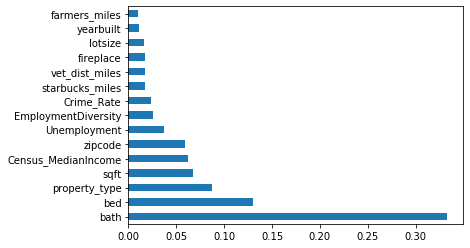

In [74]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [75]:
feature_label = newdata.columns

In [76]:
feature_label

Index(['zipcode', 'cemetery_dist_miles', 'nationalhighway_miles',
       'railline_miles', 'starbucks_miles', 'walmart_miles', 'hospital_miles',
       'physician_dist_miles', 'dentist_dist_miles', 'opt_dist_miles',
       'vet_dist_miles', 'farmers_miles', 'bed', 'bath', 'halfbath', 'sqft',
       'property_type', 'garage', 'yearbuilt', 'pool', 'fireplace', 'patio',
       'lotsize', 'Census_MedianIncome', 'Unemployment', 'EmploymentDiversity',
       'Crime_Rate', 'rent'],
      dtype='object')

In [77]:
importance = model.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_label[index], (importance[index] *100.0)))

pool-0.13%
halfbath-0.50%
patio-0.69%
nationalhighway_miles-0.70%
railline_miles-0.72%
cemetery_dist_miles-0.73%
opt_dist_miles-0.77%
physician_dist_miles-0.79%
dentist_dist_miles-0.85%
hospital_miles-0.85%
garage-0.88%
walmart_miles-0.94%
farmers_miles-1.00%
yearbuilt-1.07%
lotsize-1.63%
fireplace-1.69%
vet_dist_miles-1.72%
starbucks_miles-1.77%
Crime_Rate-2.37%
EmploymentDiversity-2.53%
Unemployment-3.72%
zipcode-5.86%
Census_MedianIncome-6.26%
sqft-6.70%
property_type-8.76%
bed-13.06%
bath-33.31%
